In [1]:
# this is a list of features
features = [
    'If an open-source project belongs to Eclipse Foundation',
    'If an open-source project is regularly scanned for vulnerable dependencies',
    'If an open-source project has a security team',
    'Number of watchers for a GitHub repository',
    'Number of contributors in the last three months',
    'If an open-source project has a security policy',
    'Info about vulnerabilities in open-source project',
    'Number of stars for a GitHub repository',
    'When first commit was done',
    'Number of commits in the last three months',
    'When a project started',
    'If an open-source project belongs to Apache Foundation',
    'If an open-source project is supported by a company',
    'If a project uses verified signed commits',
    'If a project uses LGTM',
    'The worst LGTM grade of a project'
]

In [2]:
# common constants
from datetime import datetime
from datetime import timedelta

today = datetime.today()
one_year_ago = today - timedelta(days = 365)
five_years_ago = today - timedelta(days = 5 * 365)

empty = []

In [3]:
# info about vulnerabilities

vuln_id_major = 123
vuln_id_minor = 1

# generates a unique vulnerability ID
def vuln_id():
    global vuln_id_major
    global vuln_id_minor
    id = 'VULN-{}-{}'.format(vuln_id_major, vuln_id_minor)
    vuln_id_major = vuln_id_major + 1
    vuln_id_minor = vuln_id_minor + 1
    return id

# creates a vulnerability with a unique ID and specified parameters
def vulnerability(description = '', cvss_version = 'v3', cvss = '', 
                  resolution = 'patched', introduced = '', fixed = ''):
    return {
        'id': vuln_id(),
        'description': description,
        'cvss': {
            'version': cvss_version.upper(),
            'value': cvss,
        },
        'introduced': introduced,
        'fixed': fixed,
        'resolution': resolution.upper(),
        'references': []
    }

def vulnerabilities(entries):
    result = { 'entries': [] }
    for entry in entries:
        result['entries'].append(entry)
    return result

no_vulnerabilities = vulnerabilities([])

all_vulnerabilities_fixed_very_fast = vulnerabilities([
    vulnerability(cvss = 9.0, introduced = '2019-01-01', fixed = '2019-01-03'),
    vulnerability(cvss = 7.0, introduced = '2018-11-28', fixed = '2018-12-02'),
    vulnerability(cvss = 3.0, introduced = '2017-07-04', fixed = '2017-07-08')
])

all_vulnerabilities_fixed_fast = vulnerabilities([
    vulnerability(cvss = 9.0, introduced = '2019-01-01', fixed = '2019-01-12'),
    vulnerability(cvss = 7.0, introduced = '2018-11-28', fixed = '2018-12-10'),
    vulnerability(cvss = 3.0, introduced = '2017-07-04', fixed = '2017-07-10')
])

all_vulnerabilities_fixed_slow = vulnerabilities([
    vulnerability(cvss = 9.0, introduced = '2019-01-01', fixed = '2019-05-02'),
    vulnerability(cvss = 7.0, introduced = '2018-11-28', fixed = '2018-12-31'),
    vulnerability(cvss = 3.0, introduced = '2017-02-04', fixed = '2017-05-28')
])

one_minor_unpatched_vulnerability = vulnerabilities([
    vulnerability(cvss = 1.0, resolution = 'unpatched')
])

one_major_unpatched_vulnerability = vulnerabilities([
    vulnerability(cvss = 5.0, resolution = 'unpatched')
])

one_critical_unpatched_vulnerability = vulnerabilities([
    vulnerability(cvss = 9.5, resolution = 'unpatched')
])

two_minor_unpatched_vulnerabilities = vulnerabilities([
    vulnerability(cvss = 1.0, resolution = 'unpatched'),
    vulnerability(cvss = 2.0, resolution = 'unpatched')
])

two_major_unpatched_vulnerabilities = vulnerabilities([
    vulnerability(cvss = 5.0, resolution = 'unpatched'),
    vulnerability(cvss = 6.0, resolution = 'unpatched')
])

two_critical_unpatched_vulnerabilities = vulnerabilities([
    vulnerability(cvss = 9.0, resolution = 'unpatched'),
    vulnerability(cvss = 10.0, resolution = 'unpatched')
])

In [4]:
import pprint

# returns a test vector (dict) with all unknown values
def all_unknown(alias, score_from = 0.0, score_to = 1.0, label = None):
    values = {
        'alias': alias, 
        'score_from': score_from, 
        'score_to': score_to, 
        'label': label
    }
    for feature in features:
        values[feature] = 'unknown'
    return values


class TestVector:
        
    def __init__(self, alias = ''):
        self.values = all_unknown(alias)
        
    def copy(self, vector):
        if not isinstance(vector, TestVector):
            raise Exception('Not a test vector! ({})'.format(type(vector)))
        for key in vector.values:
            if key == 'alias':
                continue
            self.values[key] = vector.values[key]
        return self
        
    def score_from(self, value):
        self.values['score_from'] = value
        return self
    
    def score_to(self, value):
        self.values['score_to'] = value
        return self
    
    def label(self, value):
        self.values['label'] = value
        return self
    
    def started(self, value):
        self.values['When first commit was done'] = value
        self.values['When a project started'] = value
        return self
    
    def is_not_popular_but_relatively_active(self):
        self.set('Number of contributors in the last three months', 20)
        self.set('Number of commits in the last three months', 2000)
        self.set('Number of watchers for a GitHub repository', 7)
        self.set('Number of stars for a GitHub repository', 89)
        return self
        
    def is_popular_and_active(self):
        self.values['Number of contributors in the last three months'] = 50
        self.values['Number of commits in the last three months'] = 1000
        self.values['Number of watchers for a GitHub repository'] = 5000
        self.values['Number of stars for a GitHub repository'] = 15000
        return self

    def cares_about_security(self):
        self.values['If an open-source project is regularly scanned for vulnerable dependencies'] = True
        self.values['If an open-source project has a security policy'] = True
        self.values['If an open-source project has a security team'] = True
        self.values['If a project uses verified signed commits'] = True
        self.values['If a project uses LGTM'] = True
        self.values['The worst LGTM grade of a project'] = 'A'
        return self
    
    def no_security_controls(self):
        self.values['If an open-source project is regularly scanned for vulnerable dependencies'] = False
        self.values['If an open-source project has a security policy'] = False
        self.values['If an open-source project has a security team'] = False
        self.values['If a project uses verified signed commits'] = False
        self.values['If a project uses LGTM'] = False
        self.values['The worst LGTM grade of a project'] = 'unknown'
        return self
    
    def good_lgtm_results(self):
        self.values['If a project uses LGTM'] = True
        self.values['The worst LGTM grade of a project'] = 'A'
        return self
    
    def not_apache_or_eclipse(self):
        self.values['If an open-source project belongs to Eclipse Foundation'] = False
        self.values['If an open-source project belongs to Apache Foundation'] = False
        return self
    
    def not_supported_by_company(self):
        self.values['If an open-source project is supported by a company'] = False
        return self
    
    def vulnerabilities(self, value):
        self.values['Info about vulnerabilities in open-source project'] = value
        return self
    
    def uses_lgtm(self, value):
        self.values['If a project uses LGTM'] = value
        return self
    
    def worst_lgtm_grade(self, value):
        self.values['The worst LGTM grade of a project'] = value
        return self
    
    def set(self, feature, value):
        self.values[feature] = value
        return self
    
    def make(self):
        return self.values
    
# this is raw data for test vectors
data = []
    
alias_counter = 0
    
# register a test vector
def register(test_vector, pretty=False):
    global data
    global alias_counter
    if isinstance(test_vector, dict):
        values = test_vector
    elif isinstance(test_vector, TestVector):
        values = test_vector.make()
    else:
        raise Exception('Unexpected object: {}'.format(type(test_vector)))
    if 'alias' not in values or values['alias'] == None or values['alias'] == '':
        values['alias'] = 'test_vector_{}'.format(alias_counter)
        alias_counter = alias_counter + 1
    data.append(values)
    print('registered: {}'.format(values['alias']))
    if pretty:
        pprint.PrettyPrinter(indent=4, depth=1).pprint(values)

In [5]:
all_unknown_values = (TestVector()
                           .score_from(0.0)
                           .score_to(0.1)
                           .label('BAD')
                      )
register(all_unknown_values)

registered: test_vector_0


In [6]:
very_bad = (TestVector()
                .copy(all_unknown_values)
                .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
                .set('If an open-source project belongs to Eclipse Foundation', False)
                .set('If an open-source project belongs to Apache Foundation', False)
                .set('If an open-source project is supported by a company', False)
                .set('If an open-source project has a security policy', False)
                .set('If an open-source project has a security team', False)
                .set('If a project uses verified signed commits', False)
                .set('Info about vulnerabilities in open-source project', one_critical_unpatched_vulnerability)
                .set('Number of contributors in the last three months', 1)
                .set('Number of commits in the last three months', 5)
                .set('Number of watchers for a GitHub repository', 0)
                .set('Number of stars for a GitHub repository', 2)
                .set('When first commit was done', five_years_ago)
                .set('When a project started', five_years_ago)
                .set('If a project uses LGTM', False)
                .set('The worst LGTM grade of a project', 'unknown')
                .score_from(0.0)
                .score_to(2.0)
                .label('BAD')
           )

register(very_bad)

registered: test_vector_1


In [7]:
very_good = (TestVector()
                 .set('If an open-source project is regularly scanned for vulnerable dependencies', True)
                 .set('If an open-source project belongs to Eclipse Foundation', False)
                 .set('If an open-source project belongs to Apache Foundation', False)
                 .set('If an open-source project is supported by a company', True)
                 .set('If an open-source project has a security policy', True)
                 .set('If an open-source project has a security team', True)
                 .set('If a project uses verified signed commits', True)
                 .set('Info about vulnerabilities in open-source project', all_vulnerabilities_fixed_very_fast)
                 .set('Number of contributors in the last three months', 50)
                 .set('Number of commits in the last three months', 1000)
                 .set('Number of watchers for a GitHub repository', 5000)
                 .set('Number of stars for a GitHub repository', 15000)
                 .set('When first commit was done', five_years_ago)
                 .set('When a project started', five_years_ago)
                 .set('If a project uses LGTM', True)
                 .set('The worst LGTM grade of a project', 'A+')
                 .score_from(9.0)
                 .score_to(10.0)
                 .label('GOOD')
            )

register(very_good)

register(
    TestVector()
        .copy(very_good)
        .set('If an open-source project belongs to Apache Foundation', True)
        .score_from(9.0)
        .score_to(10.0)
        .label('GOOD')
)

register(
    TestVector()
        .copy(very_good)
        .set('If an open-source project belongs to Eclipse Foundation', True)
        .score_from(9.0)
        .score_to(10.0)
        .label('GOOD')
)

registered: test_vector_2
registered: test_vector_3
registered: test_vector_4


In [8]:
base_vector = (TestVector()
                   .is_popular_and_active()
                   .not_apache_or_eclipse()
                   .started(five_years_ago)
                   .not_supported_by_company()
                   .good_lgtm_results()
              )

# very good, cares about security, but not supported by any known organization
register(
    TestVector()
        .copy(base_vector)
        .cares_about_security()
        .vulnerabilities(no_vulnerabilities)
        .score_from(8.0)
        .score_to(10.0)
        .label('GOOD')
        .make()
)

# very good, cares about security, but not supported by any known organization 
# and fixes vulnerabilities fast
register(
    TestVector()
        .copy(base_vector)
        .cares_about_security()
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .score_from(8.0)
        .score_to(10.0)
        .label('GOOD')
        .make()
)

registered: test_vector_5
registered: test_vector_6


In [9]:
base_vector = (TestVector()
                   .is_popular_and_active()
                   .not_apache_or_eclipse()
                   .started(five_years_ago)
                   .not_supported_by_company()
                   .no_security_controls()
              )

# active and popular but doesn't implement any security control
# and has two major unpatched vulnerabilities
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_major_unpatched_vulnerabilities)
        .score_from(3.0)
        .score_to(5.0)
        .make()
)
    
# active and popular but doesn't implement any security control
# and has one critical unpatched vulnerability
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(one_critical_unpatched_vulnerability)
        .score_from(3.0)
        .score_to(5.0)
        .make()
)

registered: test_vector_7
registered: test_vector_8


In [10]:
base_vector = (TestVector()
                   .set('Number of contributors in the last three months', 2)
                   .set('Number of commits in the last three months', 500)
                   .set('Number of watchers for a GitHub repository', 2)
                   .set('Number of stars for a GitHub repository', 23)
                   .not_apache_or_eclipse()
                   .not_supported_by_company()
                   .started(five_years_ago)
                   .cares_about_security()
              )

# not popular, but active and cares about security, 
# no vulnerability history
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(no_vulnerabilities)
        .score_from(6.0)
        .score_to(7.5)
        .make()
)

# not popular, but active and cares about security, 
# all vulnerabilities patched fast
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .score_from(6.0)
        .score_to(7.5)
        .make()
)

registered: test_vector_9
registered: test_vector_10


In [11]:
base_vector = (TestVector()
                   .is_not_popular_but_relatively_active()
                   .not_apache_or_eclipse()
                   .not_supported_by_company()
                   .started(five_years_ago)
                   .no_security_controls()
              )

# not popular, but active although doesn't cares about security,
# and has one critical unpatched vulnerability
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(one_critical_unpatched_vulnerability)
        .score_from(1.0)
        .score_to(3.0)
        .label('BAD')
        .make()
)

# not popular, but active although doesn't cares about security,
# and has two critical unpatched vulnerabilities
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(two_critical_unpatched_vulnerabilities)
        .score_from(0.0)
        .score_to(3.0)
        .label('BAD')
        .make()
)

registered: test_vector_11
registered: test_vector_12


In [12]:
base_vector = (TestVector()
                    .set('If an open-source project is regularly scanned for vulnerable dependencies', False)
                    .set('If an open-source project belongs to Eclipse Foundation', False)
                    .set('If an open-source project belongs to Apache Foundation', True)
                    .set('If an open-source project is supported by a company', False)
                    .set('If an open-source project has a security policy', True)
                    .set('If an open-source project has a security team', True)
                    .set('If a project uses verified signed commits', True)
                    .set('Number of contributors in the last three months', 42)
                    .set('Number of commits in the last three months', 1000)
                    .set('Number of watchers for a GitHub repository', 1000)
                    .set('Number of stars for a GitHub repository', 10000)
                    .set('When first commit was done', five_years_ago)
                    .set('When a project started', five_years_ago)
                    .set('If a project uses LGTM', True)
                    .set('The worst LGTM grade of a project', 'B')
              )
register(
    TestVector()
        .copy(base_vector)
        .vulnerabilities(all_vulnerabilities_fixed_fast)
        .score_from(6.0)
        .score_to(9.0)
        .make()
)

registered: test_vector_13


In [13]:
import pandas as pd
import numpy as np

# checks if two vectors have the same values
def check_same_values(first, second):
    found = False
    for key in first:
        if key in ['alias', 'score_from', 'score_to', 'label']:
            continue
        if key not in second:
            raise Exception('Missing feature: {}'.format(key))
        if first[key] != second[key]:
            found = True
    if not found:
        raise Exception('{} and {} are duplicates'.format(first['alias'], second['alias']))

# checks duplicate vectors
def check_duplicates(vector):
    global data
    for another in data:
        if vector['alias'] != another['alias']:
            check_same_values(vector, another)
        

# check if all test vectors have all required fields
aliases = set()
for vector in data:
    if 'alias' not in vector: 
        raise Exception('Missing alias!')
    if vector['alias'] in aliases:
        raise Exception('Duplicate alias "{}"!'.format(vector['alias']))
    aliases.add(vector['alias'])
    if 'score_from' not in vector:
        raise Exception('Missing score_from!')
    if vector['score_from'] < 0 or vector['score_from'] > 10:
        raise Exception('Wrong score_from!')
    if vector['score_to'] < 0 or vector['score_to'] > 10:
        raise Exception('Wrong score_to!')
    if vector['score_from'] >= vector['score_to']:
        raise Exception('score_from is greater than score_to!')
    if 'score_to' not in vector:
        raise Exception('Missing score_to!')
    for feature in features:
        if feature not in vector:
            raise Exception('Missing feature "{}"'.format(feature))
    check_duplicates(vector)

# define test vectors
test_vectors = pd.DataFrame(data)

# store the test vectors to a CSV file
filename = '../../../resources/com/sap/sgs/phosphor/fosstars/model/rating/oss/OssSecurityRatingTestVectors.csv'
test_vectors.to_csv(filename)

# drop complex fields for calculating statistics
simplified_test_vectors = test_vectors.drop(columns=[
    'alias', 
    'label', 
    'Info about vulnerabilities in open-source project'])

# print out the simplified test vectors
simplified_test_vectors

,score_from,score_to,If an open-source project belongs to Eclipse Foundation,If an open-source project is regularly scanned for vulnerable dependencies,If an open-source project has a security team,Number of watchers for a GitHub repository,Number of contributors in the last three months,If an open-source project has a security policy,Number of stars for a GitHub repository,When first commit was done,Number of commits in the last three months,When a project started,If an open-source project belongs to Apache Foundation,If an open-source project is supported by a company,If a project uses verified signed commits,If a project uses LGTM,The worst LGTM grade of a project
0,0.0,0.1,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,0.0,2.0,False,False,False,0,1,False,2,2015-03-22 11:31:54.021774,5,2015-03-22 11:31:54.021774,False,False,False,False,unknown
2,9.0,10.0,False,True,True,5000,50,True,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,False,True,True,True,A+
3,9.0,10.0,False,True,True,5000,50,True,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,True,True,True,True,A+
4,9.0,10.0,True,True,True,5000,50,True,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,False,True,True,True,A+
5,8.0,10.0,False,True,True,5000,50,True,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,False,False,True,True,A
6,8.0,10.0,False,True,True,5000,50,True,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,False,False,True,True,A
7,3.0,5.0,False,False,False,5000,50,False,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,False,False,False,False,unknown
8,3.0,5.0,False,False,False,5000,50,False,15000,2015-03-22 11:31:54.021774,1000,2015-03-22 11:31:54.021774,False,False,False,False,unknown
9,6.0,7.5,False,True,True,2,2,True,23,2015-03-22 11:31:54.021774,500,2015-03-22 11:31:54.021774,False,False,True,True,A


In [14]:
# TODO: create histograms for more columns
# TODO: add other statistics

import matplotlib.pyplot as plt
import textwrap
    
def draw_hists(columns, width=20, height=5):
    n = len(columns)
    fig, axes = plt.subplots(1, n)
    fig.set_figwidth(width)
    fig.set_figheight(height)
    i = 0
    for column in columns:
        test_vectors[column].value_counts().plot(kind='bar', rot=0, ax=axes[i])
        axes[i].set_title(textwrap.TextWrapper(width=25).fill(column))
        i = i + 1
    
def draw_hist(column):
    test_vectors[column].value_counts().plot(kind='bar', rot=0)
    plt.xlabel(column)
    plt.show()

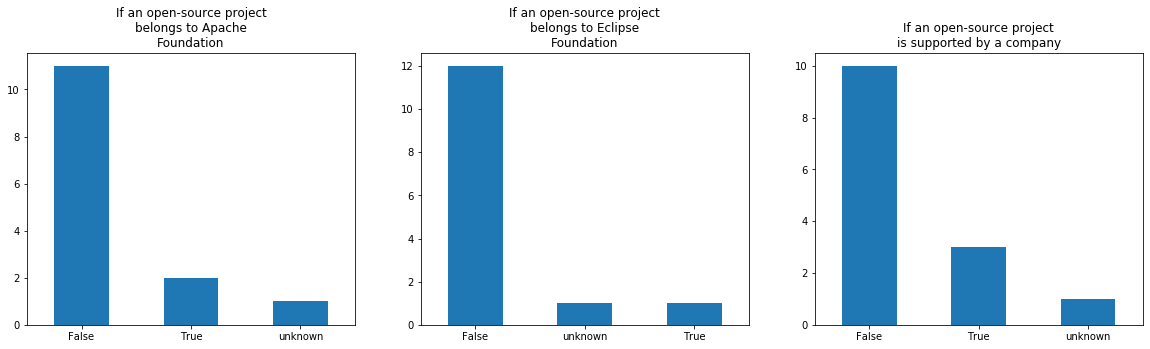

In [15]:
draw_hists([
    'If an open-source project belongs to Apache Foundation', 
    'If an open-source project belongs to Eclipse Foundation',
    'If an open-source project is supported by a company'
])

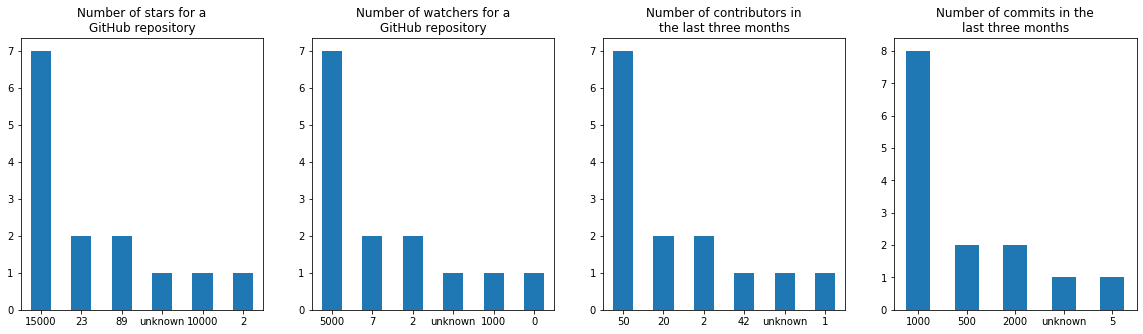

In [16]:
draw_hists([
    'Number of stars for a GitHub repository',
    'Number of watchers for a GitHub repository',
    'Number of contributors in the last three months',
    'Number of commits in the last three months'
])

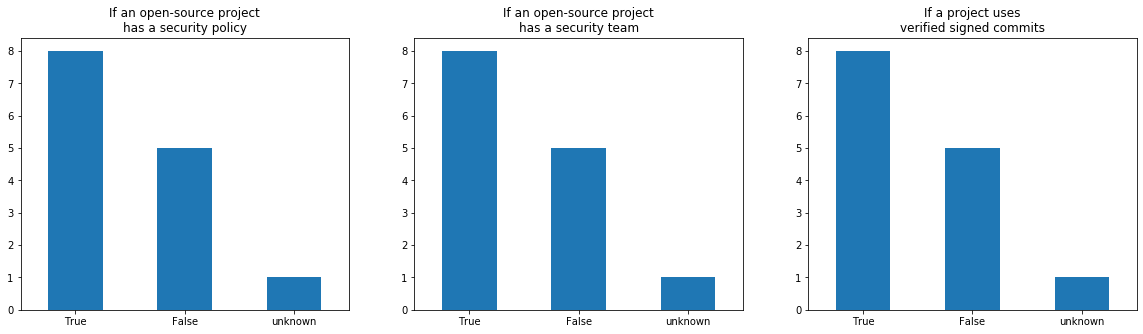

In [17]:
draw_hists([
    'If an open-source project has a security policy',
    'If an open-source project has a security team',
    'If a project uses verified signed commits'
])